In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
data = pd.read_csv("/content/city_day.csv")
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='mixed')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [ ]:
date_format1 = "%m/%d/%Y"
data['Date'] = pd.to_datetime(data['Date'], format=date_format1, errors='coerce')
invalid_dates = data['Date'].isnull()
date_format2 = "%m-%d-%Y"
data.loc[invalid_dates, 'Date'] = pd.to_datetime(data.loc[invalid_dates, 'Date'], format=date_format2, errors='coerce')

In [ ]:
data.shape[0]

29531

In [ ]:
data.duplicated().any()


False

In [ ]:
data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
Year              0
Month             0
Day               0
dtype: int64

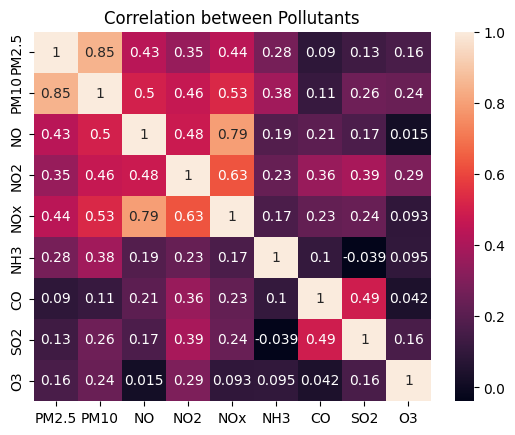

In [ ]:
correlation = data[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3']].corr()
sns.heatmap(correlation, annot=True)
plt.title('Correlation between Pollutants')
plt.show()

In [ ]:
print(data.columns)

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'Year',
       'Month', 'Day'],
      dtype='object')


In [ ]:
data_fill = data.copy()
columns_to_impute = ['Date','City','PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
data_fill['Date'] = pd.to_datetime(data_fill['Date'])
data_fill[columns_to_impute] = data_fill[columns_to_impute].fillna(data_fill[columns_to_impute].groupby(["City", pd.Grouper(key="Date", freq="5D")]).transform("mean"))
data_fill = data_fill.fillna(method="bfill")

In [ ]:
data_fill.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year,Month,Day
count,29531,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,2018-05-17 01:33:40.344722432,66.784152,120.775665,18.998039,28.461945,35.581270,26.004363,2.570033,22.446069,33.467825,3.427563,8.128898,3.728933,168.480546,2017.887914,6.362771,15.667129
min,2015-01-01 00:00:00,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000,2015.000000,1.000000,1.000000
25%,2017-04-08 00:00:00,27.780000,61.545000,5.960000,11.860000,13.690000,7.895000,0.510000,5.810000,17.240000,0.130000,0.310000,0.180000,79.000000,2017.000000,3.000000,8.000000
50%,2018-08-04 00:00:00,49.280000,92.990000,10.570000,22.245000,24.940000,18.870000,0.910000,9.740000,29.540000,1.300000,2.660000,3.140000,118.000000,2018.000000,6.000000,16.000000
75%,2019-08-28 00:00:00,79.980000,154.005000,23.285000,36.860000,44.870000,36.400000,1.520000,17.780000,44.505000,3.330000,9.740000,4.150000,213.000000,2019.000000,9.000000,23.000000
max,2020-12-06 00:00:00,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000,2020.000000,12.000000,31.000000
std,NaN,63.078443,92.848477,24.125408,24.530843,34.158059,27.234907,7.695754,39.072345,21.445104,14.743734,18.905688,5.093883,141.923045,1.533783,3.444773,8.901108


In [ ]:
data.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year,Month,Day
count,29531,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000,29531.000000,29531.000000,29531.000000
mean,2018-05-17 01:33:40.344722432,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581,2017.887914,6.362771,15.667129
min,2015-01-01 00:00:00,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000,2015.000000,1.000000,1.000000
25%,2017-04-08 00:00:00,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000,2017.000000,3.000000,8.000000
50%,2018-08-04 00:00:00,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000,2018.000000,6.000000,16.000000
75%,2019-08-28 00:00:00,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000,2019.000000,9.000000,23.000000
max,2020-12-06 00:00:00,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000,2020.000000,12.000000,31.000000
std,NaN,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585,1.533783,3.444773,8.901108


In [ ]:
data_fill.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
Year          0
Month         0
Day           0
dtype: int64

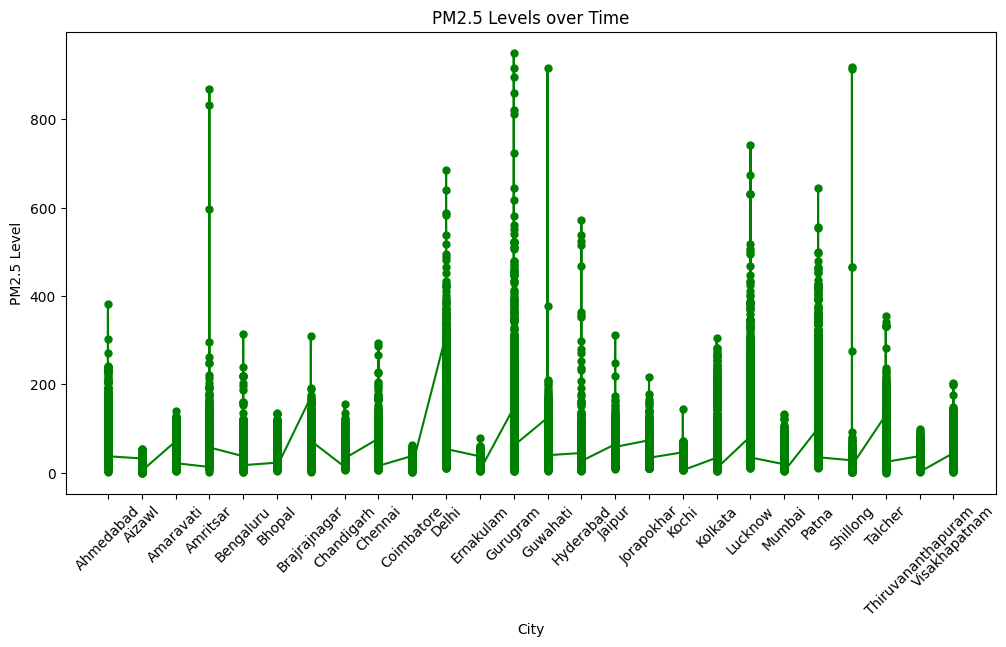

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data_fill['City'],data_fill['PM2.5'],color='green', marker='o',markersize=5,linestyle='-')
plt.xlabel('City')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 Levels over Time')
plt.xticks(rotation=45)
plt.show()

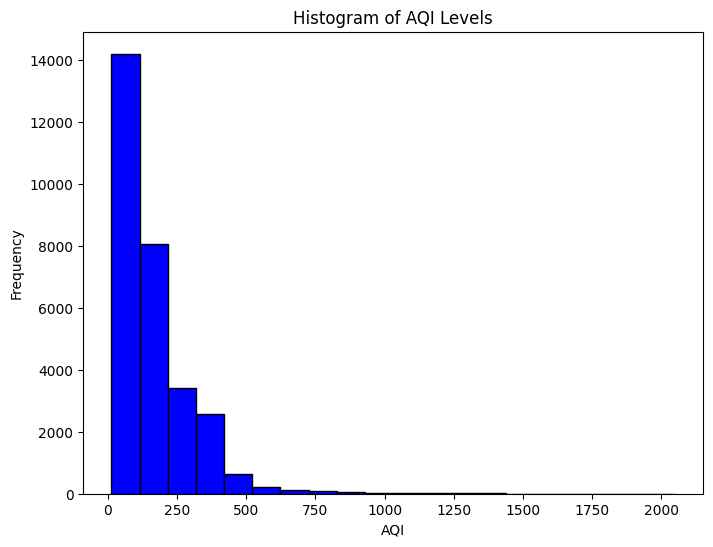

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(data_fill['AQI'], bins=20, color='blue', edgecolor='black')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.title('Histogram of AQI Levels')

plt.show()

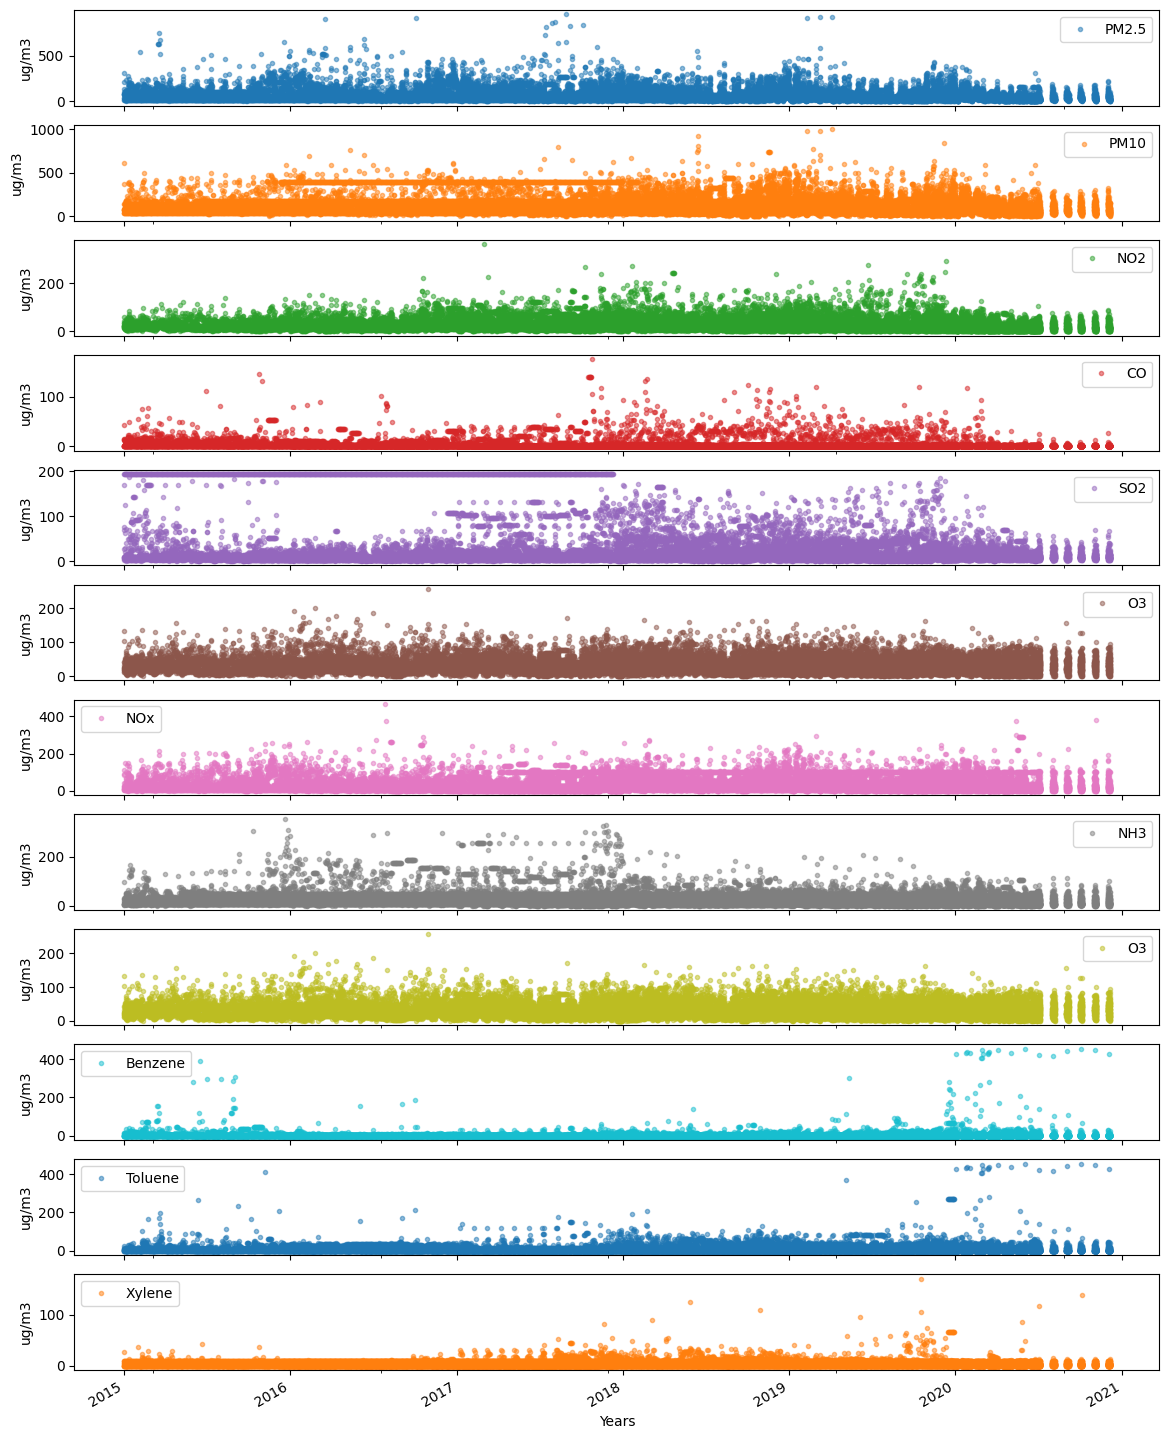

In [ ]:
pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'NOx','NH3','O3',	'Benzene' ,	'Toluene'	,'Xylene'	]
axes = data_fill.set_index('Date')[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(14, 20), subplots=True)

for ax in axes:
    ax.set_xlabel('Years')
    ax.set_ylabel('ug/m3')

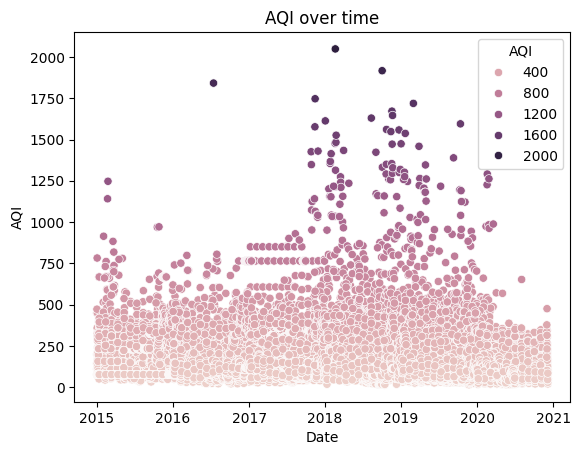

In [ ]:
ax = sns.scatterplot(x='Date',y='AQI',hue= 'AQI',data=data_fill)
ax.set_title('AQI over time')
plt.show()

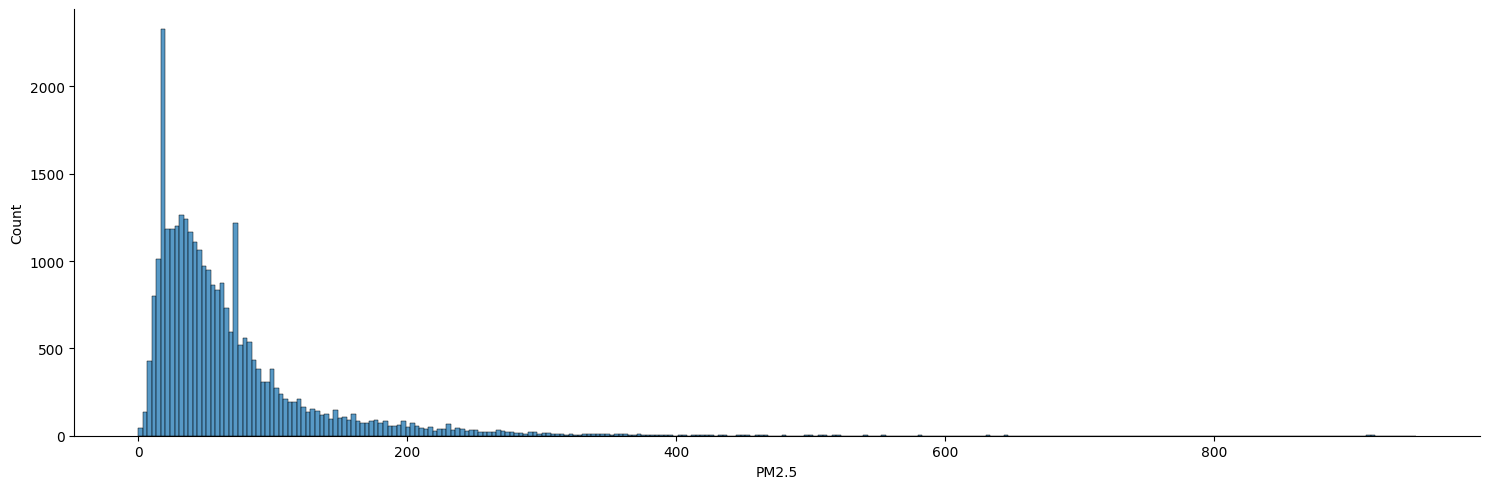

In [ ]:
sns.displot(data_fill['PM2.5'],aspect=3,height=5)

In [ ]:
mostreadingAQI = data_fill[["City","AQI_Bucket"]]
mostreadingAQI.sort_values(['City'],inplace=True,ascending=True)
mostreadingAQI.groupby(['AQI_Bucket'])
mostreadingAQI.sort_values(['City'],inplace=True,ascending=True)
mostreadingAQI.value_counts(['City', 'AQI_Bucket'])

<ipython-input-19-d243b7adec9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mostreadingAQI.sort_values(['City'],inplace=True,ascending=True)
<ipython-input-19-d243b7adec9e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mostreadingAQI.sort_values(['City'],inplace=True,ascending=True)


City           AQI_Bucket  
Mumbai         Satisfactory    1653
Bengaluru      Satisfactory    1208
Hyderabad      Moderate        1057
Chennai        Satisfactory     959
Visakhapatnam  Moderate         829
                               ... 
Kochi          Poor               2
Bhopal         Good               2
Mumbai         Very Poor          1
Coimbatore     Severe             1
Ahmedabad      Good               1
Name: count, Length: 130, dtype: int64

In [ ]:
mostreadingAQIGood =  mostreadingAQI.where(mostreadingAQI["AQI_Bucket"] == "Good")
mostreadingAQIGood.dropna()

,City,AQI_Bucket
204,Ahmedabad,Good
2015,Aizawl,Good
2065,Aizawl,Good
2034,Aizawl,Good
2035,Aizawl,Good
...,...,...
29486,Visakhapatnam,Good
29485,Visakhapatnam,Good
29525,Visakhapatnam,Good
29526,Visakhapatnam,Good


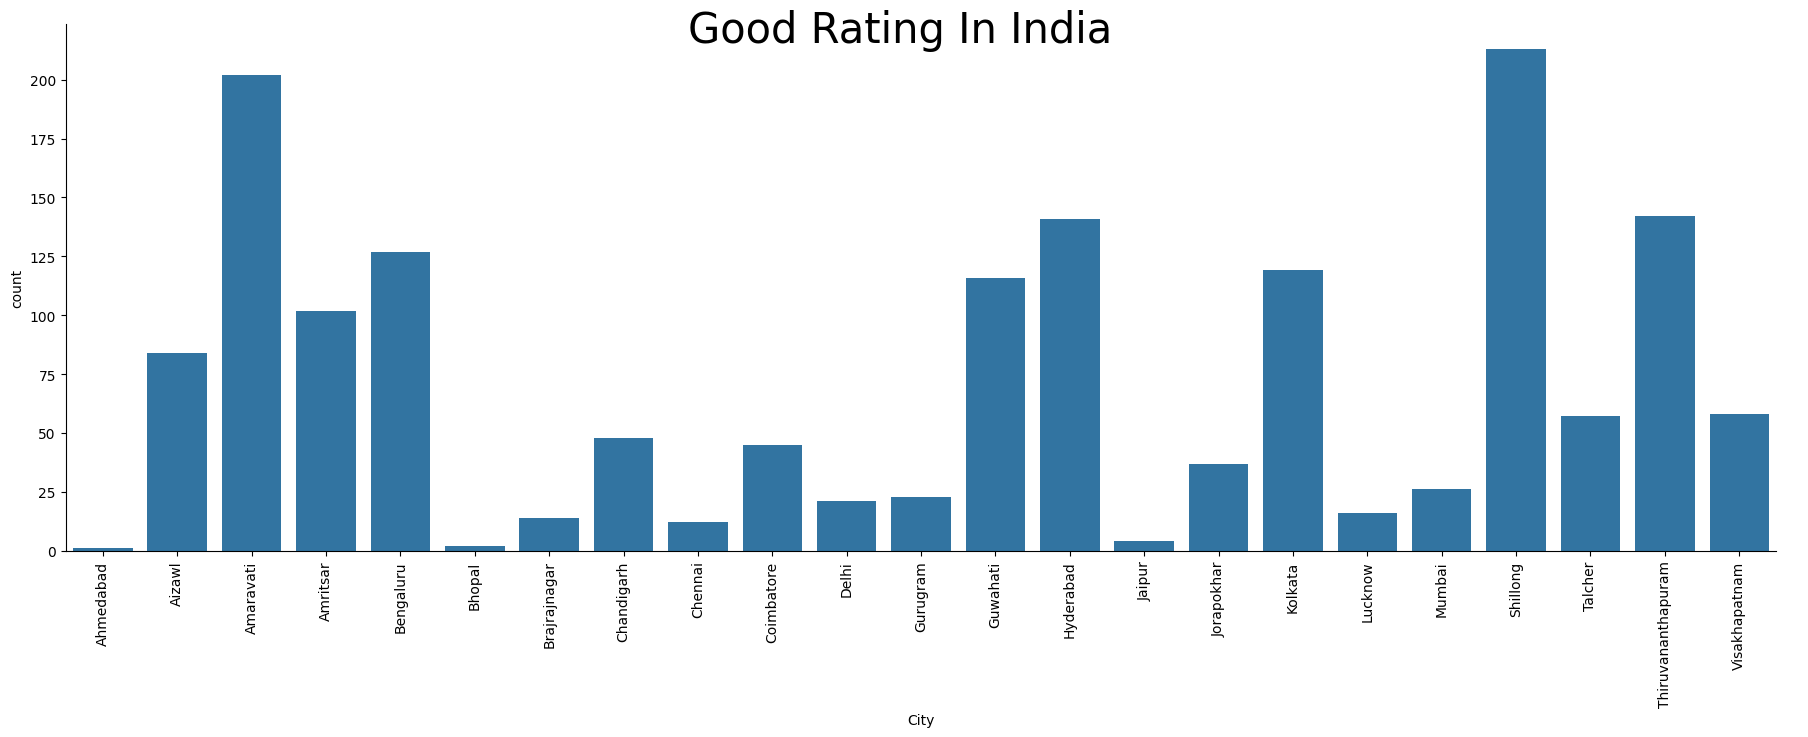

In [ ]:
plot1 = sns.catplot(x="City",data=mostreadingAQIGood,kind="count",height=6,aspect=3)
plot1.fig.suptitle('Good Rating In India', y=1.0, fontsize = 30)
plot1.set_xticklabels(rotation=90)

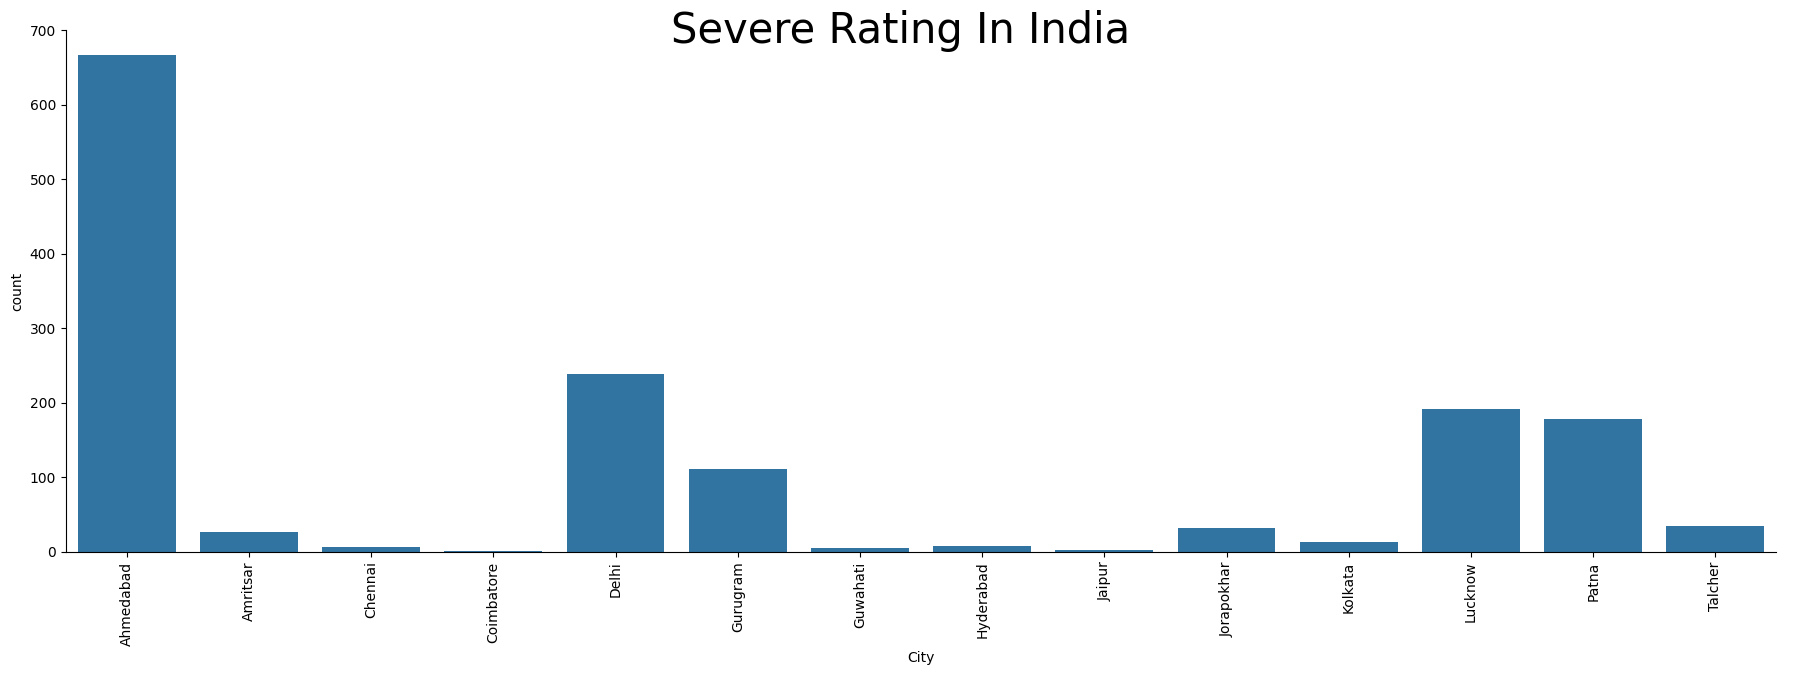

In [ ]:
mostreadingAQISevere =  mostreadingAQI.where(mostreadingAQI["AQI_Bucket"] == "Severe")
mostreadingAQISevere.dropna()
mostreadingAQISevere.value_counts()
plot1 = sns.catplot(x="City",data=mostreadingAQISevere,kind="count",height=6,aspect=3)
plot1.fig.suptitle('Severe Rating In India', y=1.0, fontsize = 30)
plot1.set_xticklabels(rotation=90)

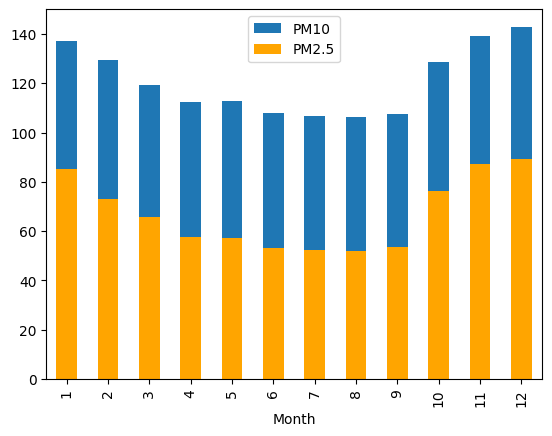

In [ ]:
data_fill[['PM2.5', 'PM10', 'Month']].groupby(['Month'])['PM10'].mean().plot(kind='bar', label='PM10')
data_fill[['PM2.5', 'PM10', 'Month']].groupby(['Month'])['PM2.5'].mean().plot(kind='bar', color='orange', label='PM2.5')
plt.legend()
plt.show()

<ipython-input-24-38e337fdd8e4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=m, x='City', y=str(pollutant), palette='Reds_r', ax=ax[axes])
<ipython-input-24-38e337fdd8e4>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[axes].set_xticklabels(m['City'], rotation=90)
<ipython-input-24-38e337fdd8e4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=m, x='City', y=str(pollutant), palette='Reds_r', ax=ax[axes])
<ipython-input-24-38e337fdd8e4>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[axes].set_xticklabels(m['City'], rotation=90)


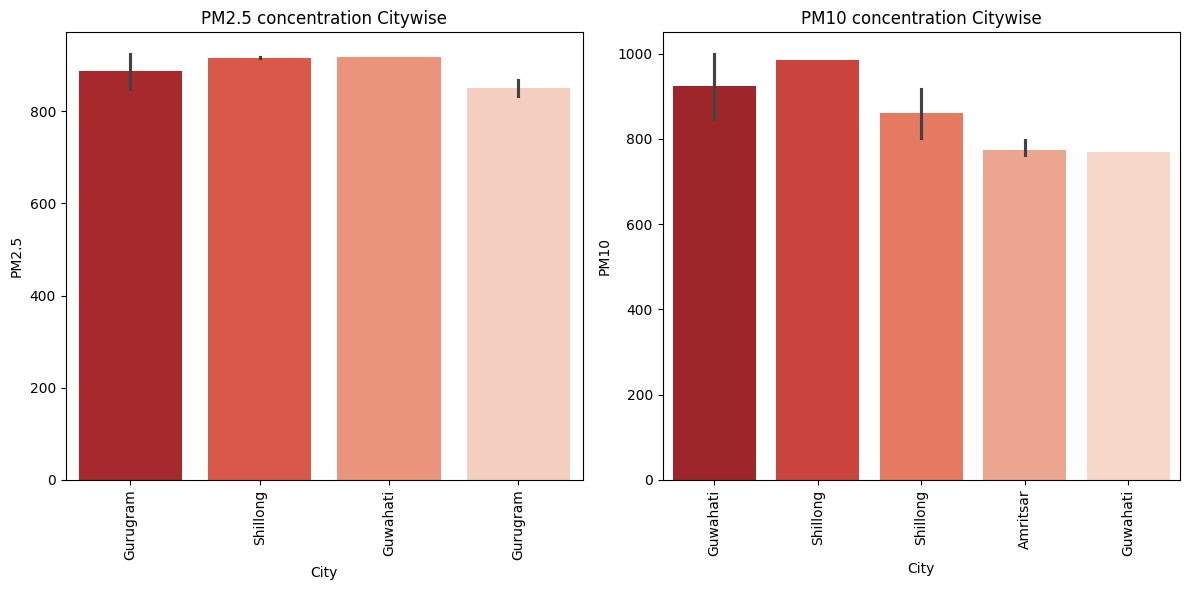

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
def city_pol_plot(pollutant, axes):
    m = data_fill[['City', str(pollutant)]].sort_values(str(pollutant), ascending=False).reset_index(drop=True).iloc[:10, :]
    sns.barplot(data=m, x='City', y=str(pollutant), palette='Reds_r', ax=ax[axes])
    ax[axes].set_xticklabels(m['City'], rotation=90)
    ax[axes].set_title(f'{pollutant} concentration Citywise')

city_pol_plot('PM2.5', 0)

city_pol_plot('PM10', 1)

plt.tight_layout()

plt.show()


In [ ]:


aqi_df = pd.DataFrame(data_fill.groupby(['City', 'AQI_Bucket'])['AQI_Bucket'].count()).rename(columns={'AQI_Bucket': 'Count'}).reset_index()

def show_AQI(df, info):
    aqi_info_df = df.loc[df.AQI_Bucket == info]
    aqi_info_df.rename(columns={'Count': str(info)}, inplace=True)
    return aqi_info_df[['City', str(info)]]


good_aqi = show_AQI(aqi_df, 'Good')
satisfactory_aqi = show_AQI(aqi_df, 'Satisfactory')
moderate_aqi = show_AQI(aqi_df, 'Moderate')
severe_aqi = show_AQI(aqi_df, 'Severe')
very_poor_aqi = show_AQI(aqi_df, 'Very Poor')
poor_aqi = show_AQI(aqi_df, 'Poor')

good_df = pd.merge(good_aqi, satisfactory_aqi, how='outer', on='City')
good_df = pd.merge(good_df, moderate_aqi, how='outer', on='City')
good_df = pd.merge(good_df, severe_aqi, how='outer', on='City')
good_df = pd.merge(good_df, very_poor_aqi, how='outer', on='City')
good_df = pd.merge(good_df, poor_aqi, how='outer', on='City')


good_df

<ipython-input-25-7aac115df3fa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi_info_df.rename(columns={'Count': str(info)}, inplace=True)
<ipython-input-25-7aac115df3fa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi_info_df.rename(columns={'Count': str(info)}, inplace=True)
<ipython-input-25-7aac115df3fa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi_info_df.rename(columns={'Count': str(info)}, inplace=True)
<ipytho

,City,Good,Satisfactory,Moderate,Severe,Very Poor,Poor
0,Ahmedabad,1.0,44,547.0,667.0,231.0,519.0
1,Aizawl,84.0,29,NaN,NaN,NaN,NaN
2,Amaravati,202.0,450,243.0,NaN,8.0,48.0
3,Amritsar,102.0,488,482.0,26.0,47.0,76.0
4,Bengaluru,127.0,1208,633.0,NaN,5.0,36.0
5,Bhopal,2.0,77,175.0,NaN,4.0,31.0
6,Brajrajnagar,14.0,163,530.0,NaN,103.0,128.0
7,Chandigarh,48.0,159,74.0,NaN,3.0,20.0
8,Chennai,12.0,959,825.0,6.0,97.0,110.0
9,Coimbatore,45.0,327,13.0,1.0,NaN,NaN


<ipython-input-26-c1d31b2e3e19>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(good_df.sort_values(value.capitalize(), ascending=False), x='City', y=value.capitalize(), palette=palette, ax=ax[axes0][axes1])
<ipython-input-26-c1d31b2e3e19>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[axes0][axes1].set_xticklabels(good_df.sort_values(value.capitalize(), ascending=False)['City'], rotation=90)
<ipython-input-26-c1d31b2e3e19>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(good_df.sort_values(value.capitalize(), ascending=False), x='City', y=value.capitalize(), palette=palette, ax=ax[axes0][axes1])
<ipython-input-26-c1d31b2e3e19>:5: UserWarning: FixedFor

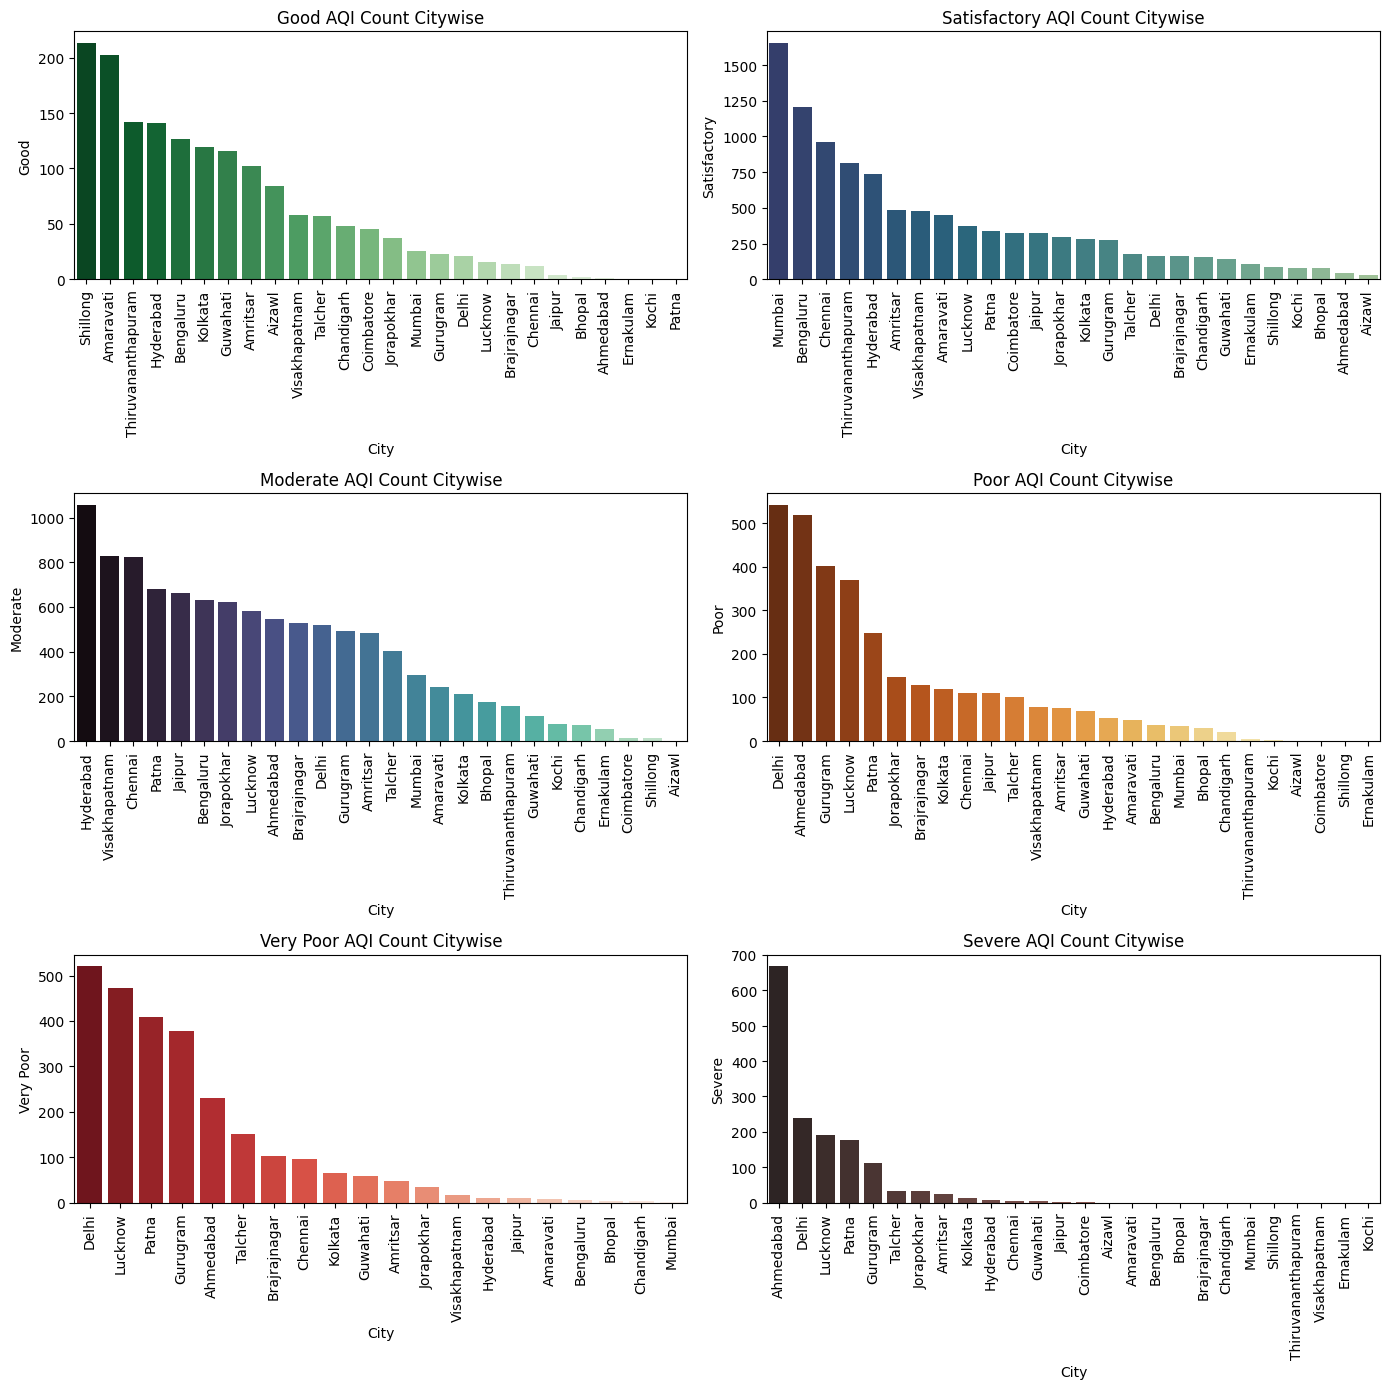

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(14, 14))

def plot_quality(value, palette, axes0, axes1):
    sns.barplot(good_df.sort_values(value.capitalize(), ascending=False), x='City', y=value.capitalize(), palette=palette, ax=ax[axes0][axes1])
    ax[axes0][axes1].set_xticklabels(good_df.sort_values(value.capitalize(), ascending=False)['City'], rotation=90)
    ax[axes0][axes1].set_title(f'{value.capitalize()} AQI Count Citywise')

plot_quality('good', 'Greens_r', 0, 0)
plot_quality('satisfactory', 'crest_r', 0, 1)
plot_quality('moderate', 'mako', 1, 0)
plot_quality('poor', 'YlOrBr_r', 1, 1)

sns.barplot(very_poor_aqi.sort_values('Very Poor', ascending=False), x='City', y='Very Poor', palette="Reds_r", ax=ax[2][0])
ax[2][0].set_xticklabels(very_poor_aqi.sort_values('Very Poor', ascending=False)['City'], rotation=90)
ax[2][0].set_title('Very Poor AQI Count Citywise')

plot_quality('severe', 'dark:salmon', 2, 1)

fig.tight_layout()
plt.show()

In [ ]:
X = data_fill.copy()
X.drop(['City','Date','AQI', 'AQI_Bucket', 'Year', 'Month', 'Day'], axis=1, inplace=True)
y = data_fill['AQI']

In [ ]:
X

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,97.4500,145.015,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.000,0.02,0.00
1,102.8300,145.015,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.680,5.50,3.77
2,52.9900,145.015,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.800,16.40,2.25
3,80.9875,145.015,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.430,10.14,1.00
4,118.0300,145.015,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.010,18.89,2.78
...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.0200,50.940,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.240,12.07,0.73
29527,24.3800,74.090,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.740,2.21,0.38
29528,22.9100,65.730,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.010,0.01,0.00
29529,16.6400,49.970,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.000,0.00,0.00


In [ ]:
print(X.columns)

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene'],
      dtype='object')


In [ ]:
X.isnull().sum()

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
dtype: int64

In [ ]:
print(y)

0        448.666667
1        459.750000
2        292.000000
3        301.250000
4        385.333333
            ...    
29526     41.000000
29527     70.000000
29528     68.000000
29529     54.000000
29530     50.000000
Name: AQI, Length: 29531, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200,
                                   min_samples_split=2,
                                   min_samples_leaf=1,
                                   max_features='sqrt',
                                   max_depth=100,
                                   bootstrap=False)

regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=100, max_features='sqrt',
                      n_estimators=200)

In [ ]:
X_train.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
6688,142.27,252.490,17.11,33.82,50.910,9.800,4.360,17.18,17.680,0.00,0.33,4.15
29333,75.61,121.940,2.95,27.03,16.780,15.920,1.120,8.24,74.210,4.93,7.53,1.13
27996,15.01,27.650,3.25,7.99,9.710,6.010,0.480,5.80,29.780,6.43,12.50,3.42
26848,37.29,73.980,84.09,3.98,0.055,12.345,1.985,28.38,56.035,0.00,12.50,3.42
21186,16.66,66.925,7.44,28.00,23.790,28.830,0.820,5.03,14.320,0.09,0.21,0.00


In [ ]:
y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))


Mean Squared Error: 1675.3850234517463
R-squared: 0.90922540518571


In [ ]:
regressor.predict(X_train)

array([325. , 128. ,  46. , ..., 342.5, 101. , 111. ])

In [ ]:
print(X.head(1))


   PM2.5     PM10    NO    NO2    NOx    NH3    CO    SO2      O3  Benzene  \
0  97.45  145.015  0.92  18.22  17.15  26.64  0.92  27.64  133.36      0.0   

   Toluene  Xylene  
0     0.02     0.0  


In [ ]:
print(y.head(1))

0    448.666667
Name: AQI, dtype: float64


In [ ]:
x_single_test=X_train.head(1)

In [ ]:
x_single_test_reshaped = np.reshape(x_single_test, (1, -1))
regressor.predict(x_single_test_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([325.])

In [ ]:
predict_integer=regressor.predict(x_single_test_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
xyz=[12,25,36,24,13,45,4,56,26,45,65,89]
xyz_reshaped = np.reshape(xyz,(1,-1) )
regressor.predict(xyz_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([167.37916667])

In [ ]:
import scipy.stats
from sklearn.ensemble import ExtraTreesRegressor
params = {
    'n_estimators': [5, 10],
    'min_samples_split': scipy.stats.randint(2, 10),
    'min_samples_leaf': scipy.stats.randint(1, 5),
    'max_features': ['auto', 'sqrt'],
    'max_depth': [3, None],
    'bootstrap': [True, False]
}
exrg = ExtraTreesRegressor(random_state=12)
exrg.fit(X_train, y_train)
y_pred = exrg.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 1832.2046202554288
R-squared: 0.900728710300933
